# CNN

## 載入套件

In [75]:
from sklearn.preprocessing import LabelEncoder
import keras #library for neural network
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import normalize #machine learning algorithm library
from sklearn.model_selection import train_test_split
from tensorflow import keras

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.utils import shuffle

preprocess_status = '_std_over_median' # read csv file name and save model file name

## read train dataset

In [76]:
df_tr = pd.read_excel("./preprocess/output_tr" + preprocess_status + ".xlsx", engine='openpyxl')
# df = pd.read_csv("final/tr.csv")
df_tr.head(3)

,AGE,SEX,LOS,Joint,Drain,Cemented,Commercial_ALBC,Non_commercial_ALBC,cci_index,elx_index,...,Fluid and Electrolyte Disorders,Blood Loss Anemia,Deficiency Anemia,Anemia,Alcohol Abuse,Drug Abuse,Psychoses,Depression,Psyciatric disorder,outcome
0,-1,1,0.82,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-0.20,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0.82,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [696]:
df_tr.shape

(96458, 67)

## read test dataset

In [ ]:
df_ts = pd.read_excel("ts.xlsx", engine='openpyxl')
# df = pd.read_csv("final/ts.csv")
df_ts.head(3)

## 資料前處理

### random row data order

In [77]:
df_tr_shuffle = shuffle(df_tr)
df_tr_shuffle

,AGE,SEX,LOS,Joint,Drain,Cemented,Commercial_ALBC,Non_commercial_ALBC,cci_index,elx_index,...,Fluid and Electrolyte Disorders,Blood Loss Anemia,Deficiency Anemia,Anemia,Alcohol Abuse,Drug Abuse,Psychoses,Depression,Psyciatric disorder,outcome
72121,0,1,0.62,0,1,1,0,1,1,2,...,0,0,0,0,0,0,0,0,0,1
82120,1,1,1.94,0,1,1,0,1,1,2,...,0,0,0,0,0,0,0,1,1,1
24767,-1,0,-1.22,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90264,-2,0,-0.20,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1340,0,1,0.48,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78003,1,1,-0.20,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
25439,0,1,0.14,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
14831,1,1,1.50,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
83654,0,0,1.26,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### 切割data and label

In [78]:
X = df_tr_shuffle.drop('outcome', 1) # data
y = df_tr_shuffle['outcome'] # label

### Encoder

In [79]:
# Convert target into LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
print(y1)

[1 1 0 ... 0 1 0]


In [80]:
# Convert target into one hot encoding
Y = pd.get_dummies(y1).values
print(Y[0:5])

[[0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]]


## 將資料分成訓練組及測試組

In [81]:
# one hot format
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=42)

# label format
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X, y,test_size=0.2,random_state=42)

In [82]:
X_train[0:5]

,AGE,SEX,LOS,Joint,Drain,Cemented,Commercial_ALBC,Non_commercial_ALBC,cci_index,elx_index,...,Weight Loss,Fluid and Electrolyte Disorders,Blood Loss Anemia,Deficiency Anemia,Anemia,Alcohol Abuse,Drug Abuse,Psychoses,Depression,Psyciatric disorder
60720,1,1,0.82,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9940,1,1,0.14,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
65330,0,0,0.48,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73838,0,0,-0.89,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
51751,-1,1,-0.20,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [83]:
y_train[0:5]

array([[0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [84]:
X_train_org[0:5]

,AGE,SEX,LOS,Joint,Drain,Cemented,Commercial_ALBC,Non_commercial_ALBC,cci_index,elx_index,...,Weight Loss,Fluid and Electrolyte Disorders,Blood Loss Anemia,Deficiency Anemia,Anemia,Alcohol Abuse,Drug Abuse,Psychoses,Depression,Psyciatric disorder
60720,1,1,0.82,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9940,1,1,0.14,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
65330,0,0,0.48,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73838,0,0,-0.89,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
51751,-1,1,-0.20,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [85]:
y_train_org[0:5]

60720    1
9940     0
65330    1
73838    1
51751    1
Name: outcome, dtype: int64

## CNN

### 載入套件

In [240]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv1D,MaxPool1D,Flatten,AveragePooling1D,GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam

### 2D convert to 3D

In [86]:
X_train_3D = tf.expand_dims(X_train, axis=1)
print(tf.shape(X_train_3D))
X_test_3D = tf.expand_dims(X_test, axis=1)
print(tf.shape(X_test_3D))

tf.Tensor([77166     1    66], shape=(3,), dtype=int32)
tf.Tensor([19292     1    66], shape=(3,), dtype=int32)


In [38]:
n_timesteps, n_features, n_outputs = X_train_3D.shape[1], X_train_3D.shape[2], y_train.shape[1]

### Define a model

In [153]:
# 第一種 基本款
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(2)
  ])

# Compile the model
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [108]:
# 第二種 2層Conv
model=Sequential()

model.add(Conv1D(filters=1, kernel_size=6, strides=1, padding='same', activation='relu', input_shape = (n_timesteps,n_features)))
model.add(Dropout(0.2))
model.add(MaxPool1D(pool_size=1))
model.add(Conv1D(6, 16, strides=1, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [117]:
# 第三種 3層Conv
model=Sequential()

model.add(Conv1D(filters=1, kernel_size=6, strides=1, padding='same', activation='relu', input_shape = (n_timesteps,n_features)))
model.add(Dropout(0.2))
model.add(MaxPool1D(pool_size=1))
model.add(Conv1D(filters=1, kernel_size=6, strides=1, padding='same', activation='relu', input_shape = (n_timesteps,n_features)))
model.add(Dropout(0.2))
model.add(MaxPool1D(pool_size=1))
model.add(Conv1D(6, 16, strides=1, padding='same', activation='relu'))
model.add(MaxPool1D(pool_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [276]:
# 第四種 1層Conv
model=Sequential()

model.add(Conv1D(filters=1, kernel_size=6, strides=1, padding='same', activation='tanh', input_shape = (n_timesteps,n_features), name="Conv1"))
model.add(MaxPool1D(pool_size=1, name="Pool1"))
model.add(Flatten(name="Flatten1"))
model.add(Dropout(0.2, name="Dropout1"))
model.add(Dense(10, activation='relu', name="Dense1"))
model.add(Dense(10, activation='relu', name="Dense2"))
model.add(keras.layers.BatchNormalization(name="BN1"))
model.add(Dense(n_outputs, activation='softmax', name="Dense3"))

# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [279]:
# 第五種 AutoML生成的
model=Sequential()

model.add(tf.keras.layers.experimental.preprocessing.Normalization(name="Normal1"))
model.add(Dense(256, activation='relu', name="Dense1"))
model.add(tf.keras.layers.ReLU(256, name="ReLU1"))
model.add(Dense(32, activation='relu', name="Dense2"))
model.add(tf.keras.layers.ReLU(32, name="ReLU2"))
model.add(Dense(n_outputs, activation='softmax', name="Dense3"))

# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### callbacks setting

In [168]:
# Train the model
ACCURACY_THRESHOLD = 0.95
# Implement callback function to stop training
# when accuracy reaches e.g. ACCURACY_THRESHOLD = 0.95
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True
callback = myCallback()
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=100, mode='max')

###  fit model

#### no weight

In [281]:
history = model.fit(X_train, y_train, validation_split=0.25, batch_size=1000, epochs=1000, callbacks=[callback])

Epoch 1/1000
58/58 [==============================] - 1s 12ms/step - loss: 0.6080 - accuracy: 0.6591 - val_loss: 0.4753 - val_accuracy: 0.7687
Epoch 2/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.4494 - accuracy: 0.7833 - val_loss: 0.3980 - val_accuracy: 0.8129
Epoch 3/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.3843 - accuracy: 0.8210 - val_loss: 0.3557 - val_accuracy: 0.8329
Epoch 4/1000
58/58 [==============================] - 0s 7ms/step - loss: 0.3451 - accuracy: 0.8396 - val_loss: 0.3329 - val_accuracy: 0.8455
Epoch 5/1000
58/58 [==============================] - 0s 7ms/step - loss: 0.3133 - accuracy: 0.8582 - val_loss: 0.3127 - val_accuracy: 0.8599
Epoch 6/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.2938 - accuracy: 0.8711 - val_loss: 0.2975 - val_accuracy: 0.8674
Epoch 7/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.2800 - accuracy: 0.8772 - val_loss: 0.2820 - val_accuracy: 0.8772
Epoch

58/58 [==============================] - 0s 6ms/step - loss: 0.1035 - accuracy: 0.9603 - val_loss: 0.1973 - val_accuracy: 0.9404
Epoch 116/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.0982 - accuracy: 0.9604 - val_loss: 0.2115 - val_accuracy: 0.9388
Epoch 117/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.1016 - accuracy: 0.9606 - val_loss: 0.1977 - val_accuracy: 0.9428
Epoch 118/1000
58/58 [==============================] - 0s 8ms/step - loss: 0.0926 - accuracy: 0.9644 - val_loss: 0.1947 - val_accuracy: 0.9442
Epoch 119/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.0933 - accuracy: 0.9638 - val_loss: 0.1931 - val_accuracy: 0.9447
Epoch 120/1000
58/58 [==============================] - 0s 7ms/step - loss: 0.0918 - accuracy: 0.9650 - val_loss: 0.1998 - val_accuracy: 0.9439
Epoch 121/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.0939 - accuracy: 0.9639 - val_loss: 0.2055 - val_accuracy: 0.9379
Epoch 1

Epoch 172/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.0896 - accuracy: 0.9650 - val_loss: 0.2131 - val_accuracy: 0.9438
Epoch 173/1000
58/58 [==============================] - 0s 8ms/step - loss: 0.0869 - accuracy: 0.9662 - val_loss: 0.2172 - val_accuracy: 0.9446
Epoch 174/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.0914 - accuracy: 0.9629 - val_loss: 0.2261 - val_accuracy: 0.9434
Epoch 175/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.0906 - accuracy: 0.9645 - val_loss: 0.2323 - val_accuracy: 0.9413
Epoch 176/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.0923 - accuracy: 0.9637 - val_loss: 0.2215 - val_accuracy: 0.9432
Epoch 177/1000
58/58 [==============================] - 0s 7ms/step - loss: 0.0864 - accuracy: 0.9656 - val_loss: 0.2124 - val_accuracy: 0.9466
Epoch 178/1000
58/58 [==============================] - 0s 7ms/step - loss: 0.0859 - accuracy: 0.9673 - val_loss: 0.2080 - val_accuracy:

Epoch 229/1000
58/58 [==============================] - 0s 5ms/step - loss: 0.0820 - accuracy: 0.9679 - val_loss: 0.2191 - val_accuracy: 0.9470
Epoch 230/1000
58/58 [==============================] - 0s 5ms/step - loss: 0.0818 - accuracy: 0.9676 - val_loss: 0.2529 - val_accuracy: 0.9408
Epoch 231/1000
58/58 [==============================] - 0s 7ms/step - loss: 0.0879 - accuracy: 0.9659 - val_loss: 0.2239 - val_accuracy: 0.9467
Epoch 232/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.0805 - accuracy: 0.9690 - val_loss: 0.2299 - val_accuracy: 0.9397
Epoch 233/1000
58/58 [==============================] - 0s 5ms/step - loss: 0.0889 - accuracy: 0.9656 - val_loss: 0.2238 - val_accuracy: 0.9476
Epoch 234/1000
58/58 [==============================] - 0s 5ms/step - loss: 0.0801 - accuracy: 0.9698 - val_loss: 0.2166 - val_accuracy: 0.9485
Epoch 235/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.0816 - accuracy: 0.9691 - val_loss: 0.2245 - val_accuracy:

Epoch 286/1000
58/58 [==============================] - 0s 7ms/step - loss: 0.0742 - accuracy: 0.9714 - val_loss: 0.2329 - val_accuracy: 0.9487
Epoch 287/1000
58/58 [==============================] - 0s 5ms/step - loss: 0.0778 - accuracy: 0.9708 - val_loss: 0.2419 - val_accuracy: 0.9465
Epoch 288/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.0804 - accuracy: 0.9682 - val_loss: 0.2323 - val_accuracy: 0.9470
Epoch 289/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.0759 - accuracy: 0.9711 - val_loss: 0.2376 - val_accuracy: 0.9461
Epoch 290/1000
58/58 [==============================] - 0s 7ms/step - loss: 0.0811 - accuracy: 0.9691 - val_loss: 0.2300 - val_accuracy: 0.9483
Epoch 291/1000
58/58 [==============================] - 0s 6ms/step - loss: 0.0773 - accuracy: 0.9698 - val_loss: 0.2306 - val_accuracy: 0.9479
Epoch 292/1000
58/58 [==============================] - 0s 7ms/step - loss: 0.0775 - accuracy: 0.9701 - val_loss: 0.2387 - val_accuracy:

#### have weight

In [ ]:
# fit model
weights = {0:1, 1:55}
history = model.fit(X_train, y_train, validation_split=0.25, batch_size=1000, epochs=1000)

## Evaluate

In [271]:
# Evaluate the model with test data
loss, accuracy = model.evaluate(X_test_3D, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.45460015535354614
Test accuracy: 0.7861289381980896


In [285]:
y_pred = model.predict(X_test_3D)
y_pred

array([[[1.14225004e-10, 1.00000000e+00]],

       [[3.13345785e-03, 9.96866524e-01]],

       [[5.61080724e-02, 9.43891883e-01]],

       ...,

       [[1.87030293e-19, 1.00000000e+00]],

       [[1.16055436e-10, 1.00000000e+00]],

       [[9.94967878e-01, 5.03208628e-03]]], dtype=float32)

In [286]:
# 計算『混淆矩陣』(Confusion Matrix)，顯示測試集分類的正確及錯認總和數
predictions = model.predict_classes(X_test_3D) 
predictions

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [287]:
#利用confusion matrix來看實際及預測的差異
confu_matrix = confusion_matrix(y_test_org,predictions)
print(confu_matrix)

[[8848  725]
 [ 203 9516]]


In [288]:
#利用classification report來看precision、recall、f1-score、support
print(classification_report(y_test_org,predictions))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      9573
           1       0.93      0.98      0.95      9719

    accuracy                           0.95     19292
   macro avg       0.95      0.95      0.95     19292
weighted avg       0.95      0.95      0.95     19292



In [289]:
import math


#      |  (a)  |  (b)  |
# --------------------------
# (a)  |  TP   |  FP   |
# --------------------------
# (b)  |  FN   |  TN   |

# fp, tn, fn, tp = confu_matrix.ravel()
tp = confu_matrix[0, 0]
fp = confu_matrix[0, 1]
fn = confu_matrix[1, 0]
tn = confu_matrix[1, 1]

acc = (tp + tn) / (tp + fp + tn + fn)
f1 = (2 * tp) / (2 * tp + fp + fn)
ppv = (tp) / (tp + fp)
recall = (tp) / (tp + fn)
mcc = ((tp * tn) - (fp * fn)) / (math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)))

tpr = tp / (tp + fn)
fpr = fp / (fp + tn) 
auc = 1/2 - fpr/2 + tpr/2

print('tp: ', tp)
print('fp: ', fp)
print('fn: ', fn)
print('tn: ', tn)
print('tpr: ', tpr)
print('fpr: ', fpr)
print('---------------------')
print('acc: ', acc)
print('f1: ', f1)
print('ppv: ', ppv)
print('recall: ', recall)
print('mcc: ', mcc)
print('auc: ', auc)

tp:  8848
fp:  725
fn:  203
tn:  9516
tpr:  0.9775715390564579
fpr:  0.070793867786349
---------------------
acc:  0.9518971594443293
f1:  0.9501718213058419
ppv:  0.9242661652564504
recall:  0.9775715390564579
mcc:  0.9050768619292447
auc:  0.9533888356350544


In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_org, predictions)
print('fpr_keras: ', fpr_keras)
print('tpr_keras: ', tpr_keras)
print('thresholds_keras: ', thresholds_keras)

In [264]:
actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)
print(f"Actual: {actual}")
print(f"Predicted: {predicted}")

Actual: [0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1
 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1
 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1
 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0
 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1
 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0
 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0]
Predicted: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [318]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.5

In [319]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test_org, predictions)

-0.015955383216590315

In [320]:
from sklearn.metrics import precision_score
precision_score(y_test_org, predictions, average='micro')

0.024725274725274724

## save model

In [275]:
# 將模型儲存至 HDF5 檔案中
model.save('./model/cnn/CNNmodel_BSET' + preprocess_status + '.h5')  # creates a HDF5 file 'my_model.h5'

## 可視化

In [284]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Normal1 (Normalization)      (None, 66)                133       
_________________________________________________________________
Dense1 (Dense)               (None, 256)               17152     
_________________________________________________________________
ReLU1 (ReLU)                 (None, 256)               0         
_________________________________________________________________
Dense2 (Dense)               (None, 32)                8224      
_________________________________________________________________
ReLU2 (ReLU)                 (None, 32)                0         
_________________________________________________________________
Dense3 (Dense)               (None, 2)                 66        
Total params: 25,575
Trainable params: 25,442
Non-trainable params: 133
_______________________________________________

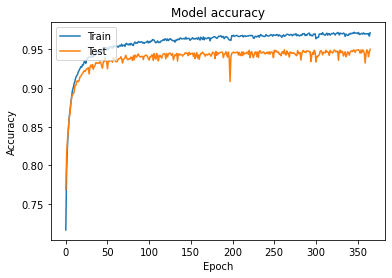

In [282]:
# 繪製訓練 & 驗證的準確率值
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

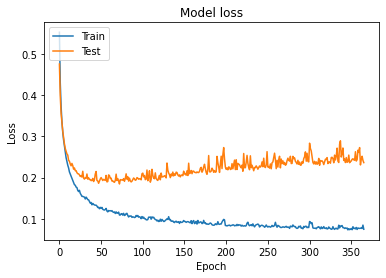

In [283]:
# 繪製訓練 & 驗證的損失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<AxesSubplot:>

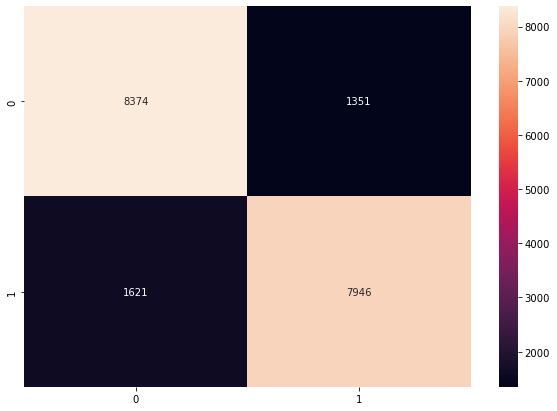

In [180]:
import seaborn as sn
df_cm = pd.DataFrame(confu_matrix, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt = ".20g", annot=True)